In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('cleaned_data.csv')
df

,Country Name,Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS,"Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS
0,Angola,56.785500,37.679,1.440151,22.406890
1,Albania,38.266399,5.403,1.244828,1.007232
2,United Arab Emirates,0.259200,188.541,2.035783,5.148113
3,Argentina,10.520800,185.030,1.572326,1.659070
4,Armenia,11.133000,6.297,1.754916,0.504952
...,...,...,...,...,...
157,Vietnam,23.491800,211.774,3.784400,1.345750
158,Vanuatu,30.777000,0.145,0.695169,0.000000
159,South Africa,10.343300,472.001,5.115334,1.693617
160,Zambia,85.104599,6.930,0.923608,4.339297


In [5]:
features = df.columns[1:]
X = df[features]
country_info = df[['Country Name']]

Data standardization

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # .fit_transform() 計算平均值和標準差，然後轉換數據
X_scaled_df = pd.DataFrame(X_scaled, columns=features) # 把標準化後的陣列轉回 DataFrame
print(X_scaled_df)

     Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS  \
0                                             0.866919                                     
1                                             0.201647                                     
2                                            -1.163708                                     
3                                            -0.795075                                     
4                                            -0.773082                                     
..                                                 ...                                     
157                                          -0.329110                                     
158                                          -0.067399                                     
159                                          -0.801451                                     
160                                           1.884243                          

Using the Elbow Method to determine the optimal number of clusters

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

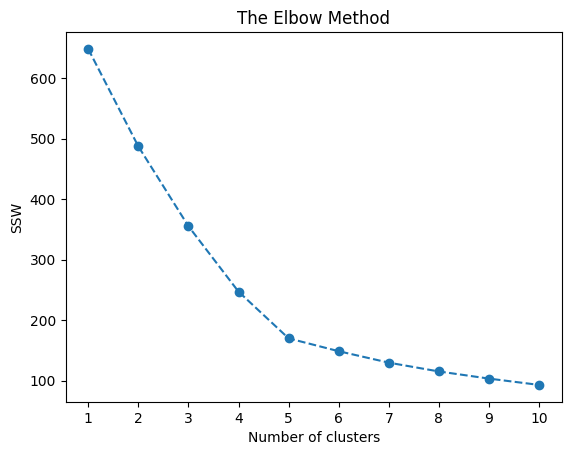

In [9]:
ssw = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    ssw.append(kmeans.inertia_) # 計算誤差平方和(SSW)

plt.plot(range(1,11), ssw, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSW')
plt.xticks(range(1,11))
plt.show()
# plt.savefig('optimal_number_of_clusters.png')


K-means clustering

In [10]:
k = 5
print('According to the Elbow Method, the optimal k value is 5.')

# random_state: to ensure that we start from the same random point each time
# n_init: 從頭到尾跑10次，每一次都用一組不同的隨機初始中心點
kmeans_final = KMeans(n_clusters=k, random_state=42, n_init=10) 
kmeans_final.fit(X_scaled) # .fit() initialize the model

# get the cluster labels from each country
cluster_labels = kmeans_final.labels_
print(f"Successfully divided the {df.shape[0]} countries into {k} clusters.\n")

According to the Elbow Method, the optimal k value is 5.
Successfully divided the 162 countries into 5 clusters.



Save the clustering result to the original data

In [71]:
df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels

# 計算每個群組的特徵平均值
cluster_summary = df_clustered.groupby('Cluster')[features].mean()
print(cluster_summary)

         Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS  \
Cluster                                                                                        
0                                                19.544407                                     
1                                                11.615500                                     
2                                                10.636486                                     
3                                                72.084684                                     
4                                                21.391225                                     

         Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes  \
Cluster                                                                                          
0                                               112.068977                                       
1                                

In [72]:
filename = 'clustered_data.csv'
df_clustered.to_csv(filename, index=False)